In [29]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil
%matplotlib inline

In [4]:
if not os.path.exists('/data'):
    os.makedirs('data')

In [17]:
!wget 'ChestXRay2017.zip' https://data.mendeley.com/datasets/rscbjbr9sj/2/files/f12eaf6d-6023-432f-acc9-80c9d7393433/ChestXRay2017.zip?dl=1

--2020-04-08 10:56:16--  http://chestxray2017.zip/
Resolving chestxray2017.zip (chestxray2017.zip)... failed: Name or service not known.
wget: unable to resolve host address ‘chestxray2017.zip’
--2020-04-08 10:56:16--  https://data.mendeley.com/datasets/rscbjbr9sj/2/files/f12eaf6d-6023-432f-acc9-80c9d7393433/ChestXRay2017.zip?dl=1
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86, 2606:4700:7::a29f:8256, ...
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/31ab5ede-ed34-46d4-b1bf-c63d70411497 [following]
--2020-04-08 10:56:17--  https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/31ab5ede-ed34-46d4-b1bf-c63d70411497
Resolving md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)... 52.218.96.43
Connecting to md-datasets-p

In [18]:
from zipfile import ZipFile
with ZipFile('ChestXRay2017.zip', 'r') as dataobj:
    dataobj.extractall(path='data')

In [ ]:
import sys
if not os.path.exists('data/workdir'):
    os.makedirs('data/workdir')
if not os.path.exists('data/workidir/bacterial'):
    os.makedirs('data/workdir/bacterial')
    os.makedirs('data/workdir/virus')
    os.makedirs('data/workdir/normal')
else:
    sys.stderr.write('Directories are already Created, process aborted!')
    

In [31]:
source = 'data/chest_xray/train/PNEUMONIA'
files = os.listdir('data/chest_xray/train/PNEUMONIA')
bacteria_dest = 'data/workdir'
virus_dest = 'data/workdir'
train_virus_files = []
train_bacteria_files = []
for file in files:
    if file.split('_')[1] == 'virus':
        train_virus_files.append(file)
        shutil.move(os.path.join(source, file), os.path.join(virus_dest,'virus'))
    else:
        train_bacteria_files.append(file)
        shutil.move(os.path.join(source, file), os.path.join(bacteria_dest, 'bacterial'))
print("Length of Virus Infected Cases are in Training Dataset: ", len(os.listdir(os.path.join(virus_dest, 'virus'))))
print("Length of Bacteria Infected Cases are in Testing Dataset: ", len(os.listdir(os.path.join(bacteria_dest, 'bacterial'))))

Length of Virus Infected Cases are in Training Dataset:  1346
Length of Bacteria Infected Cases are in Testing Dataset:  2539


In [28]:
source_normal = 'data/chest_xray/train/NORMAL'
normal_files_all = os.listdir('data/chest_xray/train/NORMAL')
normal_dest = 'data/workdir'
train_im_files = []
train_normal_files = []
for file in normal_files_all:
    if file.split('-')[0] == 'IM':
        train_im_files.append(file)
        shutil.move(os.path.join(source_normal, file), os.path.join(normal_dest, 'normal'))
    else:
        train_normal_files.append(file)
        shutil.move(os.path.join(source_normal, file), os.path.join(normal_dest, 'normal'))
print("Length of All Normal Files: ", len(os.listdir(os.path.join(normal_dest, 'normal'))))

Length of All Normal Files:  1349


In [15]:
#IF ANYTHING GOES WRONG WE DELETE ALL THE CONTENTS OF THE WORKING DIRECTORY AND UNZIP THE DATAFILE AGAIN    
# import os, shutil
# folder = 'data/'
# for filename in os.listdir(folder):
#     file_path = os.path.join(folder, filename)
#     try:
#         if os.path.isfile(file_path) or os.path.islink(file_path):
#             os.unlink(file_path)
#         elif os.path.isdir(file_path):
#             shutil.rmtree(file_path)
#     except Exception as e:
#         print('Failed to delete %s. Reason: %s' % (file_path, e))

In [45]:
import torch
import torchvision
from torchvision import datasets, transforms

In [46]:
train_dir = 'data/workdir'
image_transformer = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
train_data = datasets.ImageFolder(train_dir, transform=image_transformer)
print(len(train_data))

5233


In [47]:
train_data

Dataset ImageFolder
    Number of datapoints: 5233
    Root location: data/workdir
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )

In [48]:
batch_size = 20
num_workers=0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

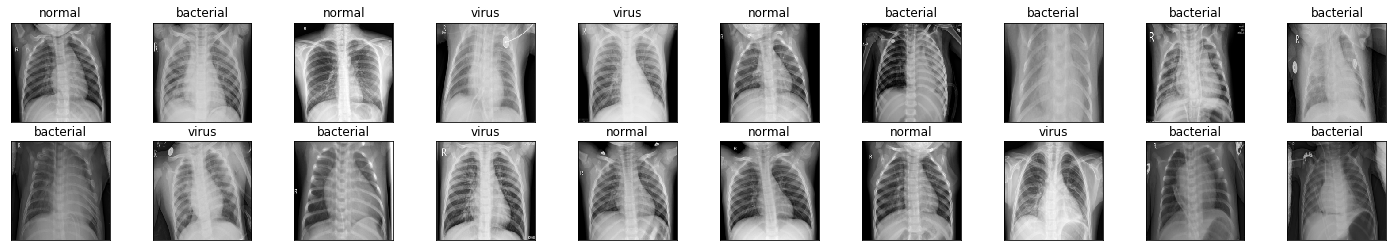

In [54]:
classes = ['bacterial', 'normal', 'virus']
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])